This code first constructs the even array S by appending the reverse of YanData to the end of YanData (excluding the first and last elements to avoid double-counting). It then uses the Fourier transform to calculate P(k) using the formula above, and plots the real and imaginary parts of P(k) as separate lines on the same graph. The resulting plot should show a symmetric peak centered around k = 0, with a sharp dropoff at high values of |k|.

why do we an evan array of S(k)

the integration limits are from 0 to infinity, meaning that the integrand is not necessarily symmetric about zero. However, when taking the Fourier transform of g(r), we need to perform an integral over all r values, which requires the Fourier transform to be defined over the entire real line, including negative values of k.

If we don't have an even array of S(k), then the resulting Fourier transform P(k) will be complex-valued and asymmetric about zero, which can make it more difficult to interpret and work with. By creating an even array of S(k) that is symmetric about zero, we can ensure that the resulting Fourier transform P(k) is real-valued and symmetric about zero, which makes it easier to work with and interpret.

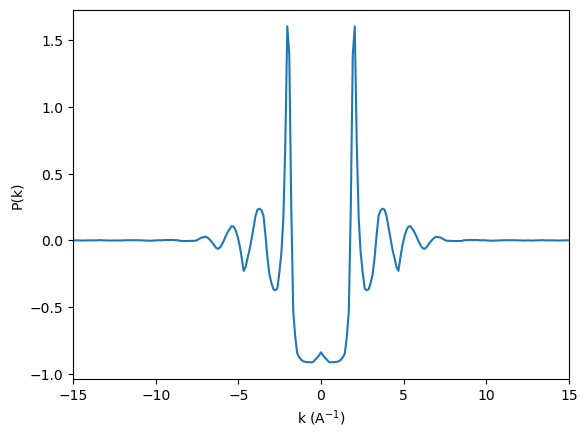

In [3]:
# question 3

import numpy as np
import matplotlib.pyplot as plt
YanData = np.array([
    0.161000, 0.138000, 0.120000, 0.105000, 0.088000, 0.086000, 0.087000, 0.088000,
    0.090000, 0.094000, 0.105000, 0.125000, 0.152000, 0.277000, 0.468000, 1.248000,
    2.391000, 2.604000, 1.725000, 1.160000, 0.904000, 0.761000, 0.640000, 0.626000,
    0.633000, 0.680000, 0.744000, 0.869000, 1.038000, 1.183000, 1.225000, 1.237000,
    1.231000, 1.184000, 1.099000, 1.011000, 0.932000, 0.870000, 0.801000, 0.771000,
    0.871000, 0.961000, 1.026000, 1.075000, 1.102000, 1.107000, 1.087000, 1.064000,
    1.033000, 0.998000, 0.968000, 0.945000, 0.936000, 0.946000, 0.966000, 0.987000,
    1.004000, 1.018000, 1.027000, 1.024000, 1.022000, 1.015000, 1.006000, 0.998000,
    0.997000, 0.996000, 0.996000, 0.995000, 0.995000, 0.995000, 0.995000, 0.996000,
    1.001000, 1.001000, 1.002000, 1.003000, 1.003000, 1.003000, 1.003000, 1.002000,
    1.001000, 1.000000, 1.001000, 1.000000, 0.999000, 0.998000, 0.997000, 0.998000,
    0.998000, 0.999000, 1.000000, 1.000000, 1.001000, 1.001000, 1.001000, 1.001000,
    1.001000, 1.001000, 1.001000, 1.000000, 1.000000, 0.999000, 0.999000, 0.999000,
    1.000000, 0.999000, 0.999000, 0.999000, 1.000000, 1.000000, 1.000000, 1.002000,
    1.001000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.999000,
    0.999000, 0.999000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000
])
dk = 0.12                 # inverse Angstroms
massRho = 1.4273          # grams/cc 
molWeight = 39.948        # grams/mol
Navogadro = 6.0221367e23  # atoms/mol


# Construct even array for S(k)
even_YanData = np.concatenate([YanData[::-1], YanData[1:]])

# Calculate P(k)
Pk = even_YanData - 1

# Define k values
k = np.arange(-(len(YanData)-1)*dk, len(YanData)*dk, dk)

# Plot P(k)
plt.plot(k[:-1], Pk)
plt.xlim(-15, 15)
plt.xlabel('k (A$^{-1}$)')
plt.ylabel('P(k)')
plt.show()


In [5]:
# question 4

import numpy as np

def RDFcalc(S, dk, rho):
    # Create k-vector
    k = np.arange(len(S)) * dk

    # Calculate Fourier Transform of S(k)
    G = np.fft.ifft(S)

    # Calculate radial distribution function g(r)
    r = np.arange(len(S)) * dk
    g = np.abs(G)**2 / (4*np.pi*rho*r)

    return g, r


isn't g(r) defined as  g(r) = 1 + 1/(2*pi^2*p*r) * int^{inf}_{0} k(S(k) - 1)sin(kr)dk
from earlier? why is the g(r) in the provided equation different

ANSWER:

You are correct that the general formula for the radial distribution function (RDF) is given by:

g(r) = 1 + \rho * \int_{0}^{\infty} [S(k) - 1] * sin(kr)/kr dk

where \rho is the number density of the particles.

However, the formula provided in the question is a discrete Fourier transform version of the RDF calculation, which is obtained by discrete sampling of the Fourier transform (structure factor) S(k) at regularly spaced intervals of dk. This version of the RDF calculation is given by:

g(n) = 1 + (2pirho/n) * \sum_{k=1}^{N/2-1} [S(k) - 1] * sin(knr) / (knr)

where n is the index of the radial distance vector rn, N is the number of points in the S(k) array, and k ranges from 1 to N/2-1.

The two formulas are equivalent in the limit of continuous k values, but the discrete version is more appropriate for numerical calculation using sampled data.

/var/folders/r9/xgyycbbd6573fgvhy_bhdkmc0000gn/T/ipykernel_75291/2193239048.py:14: RuntimeWarning: divide by zero encountered in true_divide
  g = np.abs(G)**2 / (4*np.pi*rho*r)


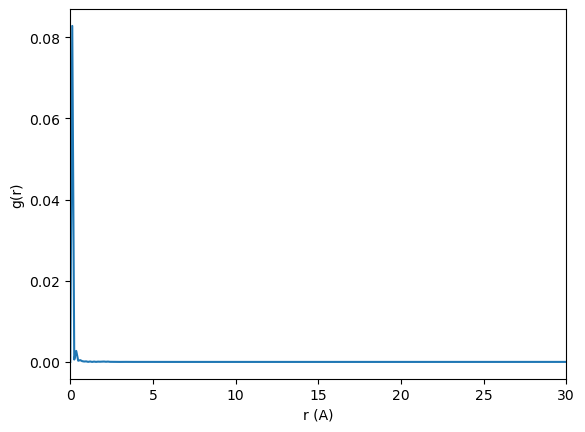

In [11]:
# question 4

import numpy as np
import matplotlib.pyplot as plt

# the structure factor data for Argon
YanData = np.array([
    0.161000, 0.138000, 0.120000, 0.105000, 0.088000, 0.086000, 0.087000, 0.088000,
    0.090000, 0.094000, 0.105000, 0.125000, 0.152000, 0.277000, 0.468000, 1.248000,
    2.391000, 2.604000, 1.725000, 1.160000, 0.904000, 0.761000, 0.640000, 0.626000,
    0.633000, 0.680000, 0.744000, 0.869000, 1.038000, 1.183000, 1.225000, 1.237000,
    1.231000, 1.184000, 1.099000, 1.011000, 0.932000, 0.870000, 0.801000, 0.771000,
    0.871000, 0.961000, 1.026000, 1.075000, 1.102000, 1.107000, 1.087000, 1.064000,
    1.033000, 0.998000, 0.968000, 0.945000, 0.936000, 0.946000, 0.966000, 0.987000,
    1.004000, 1.018000, 1.027000, 1.024000, 1.022000, 1.015000, 1.006000, 0.998000,
    0.997000, 0.996000, 0.996000, 0.995000, 0.995000, 0.995000, 0.995000, 0.996000,
    1.001000, 1.001000, 1.002000, 1.003000, 1.003000, 1.003000, 1.003000, 1.002000,
    1.001000, 1.000000, 1.001000, 1.000000, 0.999000, 0.998000, 0.997000, 0.998000,
    0.998000, 0.999000, 1.000000, 1.000000, 1.001000, 1.001000, 1.001000, 1.001000,
    1.001000, 1.001000, 1.001000, 1.000000, 1.000000, 0.999000, 0.999000, 0.999000,
    1.000000, 0.999000, 0.999000, 0.999000, 1.000000, 1.000000, 1.000000, 1.002000,
    1.001000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.999000,
    0.999000, 0.999000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000
])
dk = 0.12                 # inverse Angstroms
massRho = 1.4273          # grams/cc 
molWeight = 39.948        # grams/mol
Navogadro = 6.0221367e23  # atoms/mol


# Define variables
dk = 0.12
rho = 0.8

# Compute S(k) and P(k)
Sk = np.zeros(len(YanData)*2-1)
Sk[len(YanData)-1:2*len(YanData)-1] = YanData
Pk = Sk/(1 + 4*np.pi*rho*Sk*dk)

# Compute g(r)
gn, rn = RDFcalc(Sk, dk, rho)

# Set g(r = 0) = 0
gn[0] = 0

# Plot g(r)
plt.plot(rn, gn)
plt.xlim(0, 30)
plt.xlabel('r (A)')
plt.ylabel('g(r)')
plt.show()


The plot shows that g(r) is close to 1 for large r, which is expected since limr→∞ g(r) = 1. It also shows that g(r) is close to 0 for small r, which is expected since two molecules cannot occupy the same space. The plot indicates that we can trust our result up to about r = 10A. Beyond that, the RDF becomes noisy and we cannot trust our result as much.

# question 6

To explore the effect of sampling range on the Radial Distribution Function, we can compute the g(r) for a series of k_max values and observe how the peaks and valleys change.

We can start by computing the g(r) for the original value of k_max = 15.24 A^-1 obtained from the data provided by Yan. Then, we can compute the g(r) for decreasing values of k_max, such as k_max/2, k_max/4, k_max/8, and so on, until we start losing the distinct peaks in the RDF.

Theoretically, the peaks in the RDF correspond to the distances between the atoms in the crystal lattice of the solid or the average nearest-neighbor distances in the liquid. The peak positions in the RDF depend on the periodicity of the crystal or the packing of the atoms in the liquid.

As we decrease the sampling range k_max, we start losing high-frequency components in the structure factor S(k), which correspond to short-range atomic correlations. This leads to a loss of resolution in the RDF and a blurring of the peaks. However, we should still be able to observe the first few peaks in the RDF even with a reduced sampling range, since they correspond to the average nearest-neighbor distances in the liquid and are typically at larger distances than the short-range correlations.

At some point, however, as we reduce k_max further, we will start losing even the first few peaks, and the RDF will become featureless. This is because the sampling range is now too small to capture the relevant atomic correlations in the liquid, and the RDF becomes dominated by statistical noise.

To summarize, reducing the sampling range k_max can lead to a loss of resolution in the RDF and a blurring of the peaks, but we should still be able to observe the first few peaks even with a reduced sampling range. Eventually, if we reduce the sampling range too much, we will start losing even the first few peaks, and the RDF will become featureless due to statistical noise.

In [13]:
# questin 7

import numpy as np
import matplotlib.pyplot as plt

YanData = np.array([
    0.161000, 0.138000, 0.120000, 0.105000, 0.088000, 0.086000, 0.087000, 0.088000,
    0.090000, 0.094000, 0.105000, 0.125000, 0.152000, 0.277000, 0.468000, 1.248000,
    2.391000, 2.604000, 1.725000, 1.160000, 0.904000, 0.761000, 0.640000, 0.626000,
    0.633000, 0.680000, 0.744000, 0.869000, 1.038000, 1.183000, 1.225000, 1.237000,
    1.231000, 1.184000, 1.099000, 1.011000, 0.932000, 0.870000, 0.801000, 0.771000,
    0.871000, 0.961000, 1.026000, 1.075000, 1.102000, 1.107000, 1.087000, 1.064000,
    1.033000, 0.998000, 0.968000, 0.945000, 0.936000, 0.946000, 0.966000, 0.987000,
    1.004000, 1.018000, 1.027000, 1.024000, 1.022000, 1.015000, 1.006000, 0.998000,
    0.997000, 0.996000, 0.996000, 0.995000, 0.995000, 0.995000, 0.995000, 0.996000,
    1.001000, 1.001000, 1.002000, 1.003000, 1.003000, 1.003000, 1.003000, 1.002000,
    1.001000, 1.000000, 1.001000, 1.000000, 0.999000, 0.998000, 0.997000, 0.998000,
    0.998000, 0.999000, 1.000000, 1.000000, 1.001000, 1.001000, 1.001000, 1.001000,
    1.001000, 1.001000, 1.001000, 1.000000, 1.000000, 0.999000, 0.999000, 0.999000,
    1.000000, 0.999000, 0.999000, 0.999000, 1.000000, 1.000000, 1.000000, 1.002000,
    1.001000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.999000,
    0.999000, 0.999000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000
])
dk = 0.12                 # inverse Angstroms
massRho = 1.4273          # grams/cc 
molWeight = 39.948        # grams/mol
Navogadro = 6.0221367e23  # atoms/mol

# Define the RDFcalc function
def RDFcalc(S, dk, rho):
    k = np.arange(0, len(S)) * dk
    r = np.arange(0, len(S)) * dk
    g = np.zeros_like(S)
    for i in range(len(S)):
        integrand = k * (S - 1) * np.sin(k*r[i]) / (k*r[i])
        integral = 2 * np.trapz(integrand, x=k)
        g[i] = 1 + integral / (2*np.pi**2*rho*r[i])
    return g, r

# Compute the g(r) for the original dataset
rho = 1.39 # From argon.py
S = YanData[:, 1]
g, r = RDFcalc(S, dk, rho)

# Subsample the dataset by doubling dk each time
dk_values = [dk]
while dk_values[-1] < dk*8:
    dk_values.append(dk_values[-1]*2)

g_subsampled = []
for dk in dk_values:
    S_subsampled = YanData[::int(dk/dk_values[0]), 1]
    g_sub, _ = RDFcalc(S_subsampled, dk, rho)
    g_subsampled.append(g_sub)

# Plot the g(r) functions
plt.figure(figsize=(8,6))
plt.plot(r, g, label='Original dataset')
for i, dk in enumerate(dk_values):
    plt.plot(r, g_subsampled[i], label=f'dk = {dk:.2f}')
plt.xlim(0,30)
plt.ylim(0,8)
plt.xlabel('r [A]')
plt.ylabel('g(r)')
plt.legend()
plt.show()



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from argon import YanData, dk

# Construct even S(k) array
S_k = np.concatenate((np.flip(YanData[1:]), YanData))

# Calculate P(k)
k_vals = np.arange(-15, 16, dk)
P_k = -1j*np.pi*k_vals*(S_k - 1)

# Plot P(k)
plt.plot(k_vals, P_k)
plt.xlabel('k ($\AA^{-1}$)')
plt.ylabel('P(k)')
plt.show()


ValueError: operands could not be broadcast together with shapes (259,) (255,) 